## KNN 연습문제

### 인도의 간질환자 예측 모델  
- 사용 데이터 세트 : 인도의 간질환자 데이터 (indian_liver_patient.csv)
- 데이터 세트 분리 : 테스트용(평가용) 데이터 세트 
- 사용하는 ML 알고리즘 : KNN 알고리즘  
- 모델 평가 : 예측 성능 평가   
    - 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
liver_df = pd.read_csv('../../data/indian_liver_patient.csv')
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
# 수행해야 될 작업 알아서 처리

- Age
- Gender
- Total_Bilirubin
- Direct_Bilirubin
- Alkaline_Phosphotase
- Alamine_Aminotransferase
- Aspartate_Aminotransferase
- Total_Protiens
- Albumin
- Albumin_and_Globulin_Ratio
- Dataset

## 1. 데이터 준비

### 결측치 처리

In [7]:
# 결측치 확인
liver_df.info()
# Albumin_and_Globulin_Ratio null 4개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
# Albumin_and_Globulin_Ratio null 4개 처리
# 평균 값 0.9470639032815197 으로 채워준다.
# 4개 밖에 안되니까 삭제해도 된다.
liver_df['Albumin_and_Globulin_Ratio'].fillna(liver_df['Albumin_and_Globulin_Ratio'].mean(), inplace = True)

liver_df['Albumin_and_Globulin_Ratio'].isnull().sum() # 처리 완료

0

### 0 값 처리

In [9]:
# 추가로 0값이 있는지 확인
# liver_df['Age'].value_counts()
# liver_df['Gender'].value_counts()
# liver_df['Total_Bilirubin'].value_counts()
# liver_df['Direct_Bilirubin'].value_counts()
# liver_df['Alkaline_Phosphotase'].value_counts()
# liver_df['Alamine_Aminotransferase'].value_counts()
# liver_df['Aspartate_Aminotransferase'].value_counts()
# liver_df['Total_Protiens'].value_counts()
# liver_df['Albumin'].value_counts()
# liver_df['Albumin_and_Globulin_Ratio'].value_counts()

# 비이상적인 0값 없음

### 레이블 인코딩

In [56]:
# label encoding 적용할 피쳐
# Gender값 문자열 -> 숫자 변경
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder = encoder.fit(liver_df['Gender'])
liver_df['Gender'] = encoder.transform(liver_df['Gender'])

liver_df.head()
# Gender 값이 0, 1로 변경

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### 필요없는 열 제거

In [11]:
# 필요없는 열이 발견되지 않음

### label data, feature data

In [144]:
liver_df['Dataset'].replace(2, 0, inplace=True)
# 정상인은 0으로 레이블을 바꿔준다.

In [145]:
# label data 확인 : 'Dataset'
# class 결정값 0,1
liver_df['Dataset'].value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

In [146]:
# label data
label_data = liver_df['Dataset']

# feature data
feature_data = liver_df.drop('Dataset', axis=1)
feature_data.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74


In [162]:
liver_df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<Axes: >

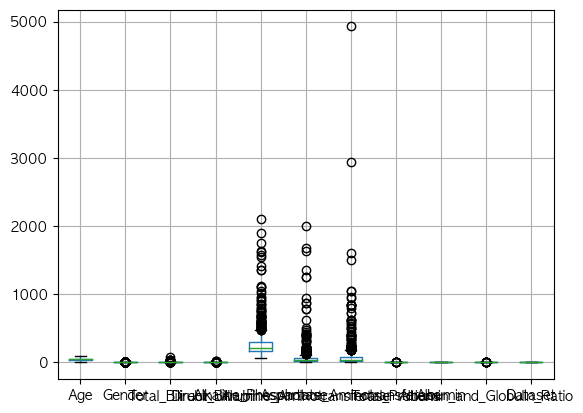

In [164]:
liver_df.boxplot()

<Axes: >

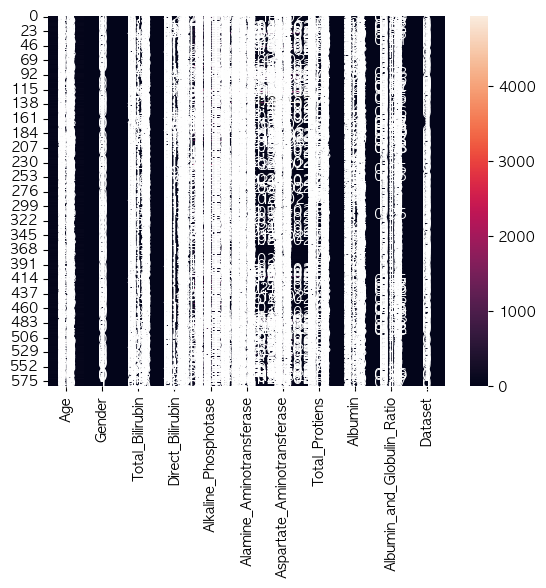

In [165]:
import seaborn as sns
sns.heatmap(liver_df, annot=True)

## 2. 데이터 분리 

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
# stratify= label 데이터 옵션 없는 경우
X_train, X_test, y_train, y_test = train_test_split(feature_data,
                                                    label_data,
                                                    test_size=0.2, 
                                                    random_state=11)


In [150]:
# stratify= label 데이터 옵션 없는 경우
# 분리 후 y 값들
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Dataset
1    0.714592
0    0.285408
Name: proportion, dtype: float64

Dataset
1    0.709402
0    0.290598
Name: proportion, dtype: float64

In [151]:
# stratify= label 데이터 옵션 있는 경우
X_train, X_test, y_train, y_test = train_test_split(feature_data,
                                                    label_data,
                                                    test_size=0.2, 
                                                    random_state=11,
                                                    stratify = label_data)


In [152]:
# stratify= label 데이터 옵션 있는 경우
# 분리 전
label_data.value_counts(normalize=True)

# 분리 후 y 값들
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Dataset
1    0.713551
0    0.286449
Name: proportion, dtype: float64

Dataset
1    0.714592
0    0.285408
Name: proportion, dtype: float64

Dataset
1    0.709402
0    0.290598
Name: proportion, dtype: float64

In [19]:
# 결과
# stratify 없으나 있으나 똑같음

## 3. 모델링



In [153]:
from sklearn.metrics import accuracy_score

###  알고리즘
- K-NN

In [154]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 생성
kn_clf = KNeighborsClassifier() # n_neighbors=5 디폴트

In [155]:
# 모델 학습 및 예측
kn_clf.fit(X_train, y_train)
y_pred_kn = kn_clf.predict(X_test)
print('K-NN 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred_kn)))

KNeighborsClassifier()

K-NN 정확도 : 0.6496


## 4. 성능 평가 지표 출력

In [156]:
# 평가 수행 : 다양한 평가지표로 수행
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, y_pred, pred_proba):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
     # 오차행렬
    print('오차행렬 : ', cm)
    # 정확도, 정밀도, 재현율, F1
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f},  F1 : {f1:.4f}, ROC_AUC : {roc_auc:.4f}")

In [157]:
# label 값이 1일 때의 예측 확률
pred_proba = kn_clf.predict_proba(X_test)[:, 1] 
# 함수 실행
get_clf_eval(y_test, y_pred_kn, pred_proba) 

오차행렬 :  [[ 8 26]
 [15 68]]
정확도: 0.6496, 정밀도: 0.7234, 재현율: 0.8193,  F1 : 0.7684, ROC_AUC : 0.6703


In [83]:
# 환자의 질병정보이므로 
# 재현율에 더 초점을 맞춰 조정해야함 

## 5.조정

### 스케일링

In [158]:
from sklearn.preprocessing import StandardScaler

# 표준 스케일링 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.head()


# 테스트 데이터도 스케일링하기
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,1.064662,0.56248,0.290288,0.181735,-0.778248,-0.331704,-0.222530,-1.393527,-1.340003,2.375269
1,-1.012484,-1.77784,-0.440830,-0.458824,0.029187,-0.130712,-0.278463,0.292454,1.226019,1.727123
2,0.637014,0.56248,0.046582,0.013167,0.185970,-0.212195,-0.123825,0.667116,-0.313594,-1.081510
3,0.637014,0.56248,-0.423423,-0.458824,-0.437244,-0.293678,-0.262012,-0.550537,-0.570196,-0.464228
4,0.820292,0.56248,-0.423423,-0.458824,3.129580,-0.293678,-0.235691,0.573451,0.456212,-0.155587


,0,1,2,3,4,5,6,7,8,9
0,1.924084,0.587220,-0.227210,-0.389995,-0.178243,-0.212243,-0.409565,-0.491627,-0.622938,-0.795875
1,1.273266,0.587220,0.609561,1.540099,0.196655,-0.212243,-0.216231,-0.404606,-0.154232,0.225632
2,-0.614105,0.587220,0.274853,0.550307,-0.569927,-0.314692,-0.124168,-1.187788,-0.622938,0.225632
3,-0.158533,0.587220,-0.304451,-0.488974,-0.306939,-0.331766,-0.455596,-0.404606,-0.271409,-0.114871
4,-0.744268,-1.702939,-0.330197,-0.538464,-0.480399,-0.411449,-0.460200,0.117514,0.314473,0.225632


In [160]:
# 스케일링된 학습 데이터로 재학습
kn_clf.fit(X_train_scaled, y_train)

# label 값이 1일 때의 예측 확률
pred_proba = kn_clf.predict_proba(X_test_scaled)[:, 1] 

# 함수 실행
get_clf_eval(y_test, y_pred_kn, pred_proba) 

KNeighborsClassifier()

오차행렬 :  [[ 8 26]
 [15 68]]
정확도: 0.6496, 정밀도: 0.7234, 재현율: 0.8193,  F1 : 0.7684, ROC_AUC : 0.6662


In [161]:
# 스케일링 결과
# 전
# 오차행렬 :  [[ 8 26]
#  [15 68]]
# 정확도: 0.6496, 정밀도: 0.7234, 재현율: 0.8193,  F1 : 0.7684, ROC_AUC : 0.6703
# 후
# 오차행렬 :  [[ 8 26]
#  [15 68]]
# 정확도: 0.6496, 정밀도: 0.7234, 재현율: 0.8193,  F1 : 0.7684, ROC_AUC : 0.6662

# 스케일링 후 ROC_AUC만 조금 감소했다.